<a href="https://colab.research.google.com/github/nabdeep-patel/edu/blob/main/SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
X.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


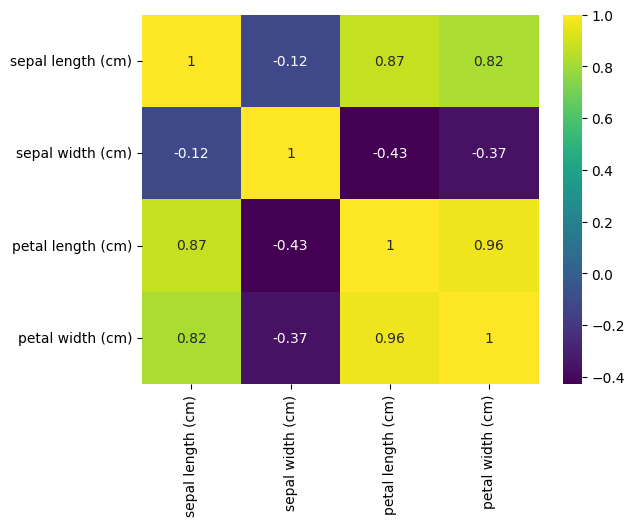

In [7]:
sns.heatmap(X.corr(), annot=True, cmap='viridis')
plt.show()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

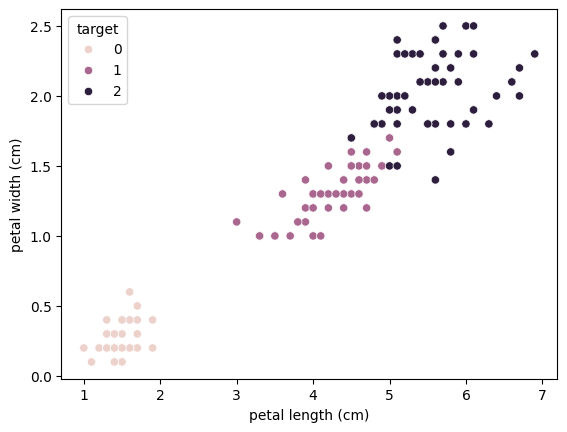

In [9]:
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=y)

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

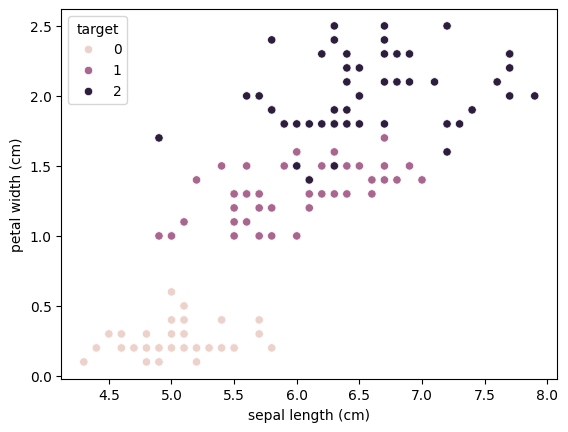

In [10]:
sns.scatterplot(data=X, x='sepal length (cm)', y='petal width (cm)', hue=y)

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

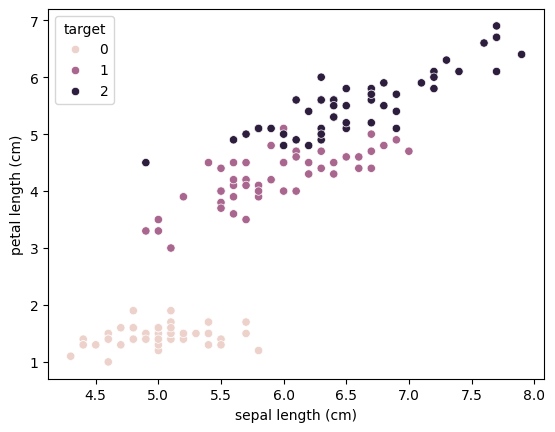

In [11]:
sns.scatterplot(data=X, x='sepal length (cm)', y='petal length (cm)', hue=y)

# Training

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=20)

In [17]:
X_train.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
5.8                2.7               5.1                1.9                 2
4.4                2.9               1.4                0.2                 1
6.1                3.0               4.6                1.4                 1
6.3                3.4               5.6                2.4                 1
                   3.3               6.0                2.5                 1
                                                                           ..
5.2                4.1               1.5                0.1                 1
                   3.5               1.5                0.2                 1
                   2.7               3.9                1.4                 1
5.1                3.8               1.9                0.4                 1
7.9                3.8               6.4                2.0                 1
Name: count, Length: 119, dtype: int64

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
scale_pipe = Pipeline([ ('scaler', MinMaxScaler())]) # Scaking from 0 to 1
X_train_scaled = scale_pipe.fit_transform(X_train)

In [20]:
from sklearn.svm import SVC, LinearSVC
linear = LinearSVC()
linear.fit(X_train_scaled, y_train)
poly = SVC(kernel='poly')
poly.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC(kernel='poly')

In [21]:
from sklearn.metrics import accuracy_score
linpred = linear.predict(X_train_scaled)
accuracy_score(y_train, linpred)

0.95

In [22]:
from sklearn.metrics import accuracy_score
polpred = poly.predict(X_train_scaled)
accuracy_score(y_train, polpred)

0.9833333333333333

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_train, polpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.95      0.97        39
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [26]:
X_test_s = scale_pipe.fit_transform(X_test)

In [27]:
polpredt = poly.predict(X_test_s)
accuracy_score(y_test, polpredt)

0.9666666666666667